# Steps

Important revelent libraries/modules

* **Basic EDA**
    * Missing Data
    * Dublicate data
    * Outliers or Anomalies
    * Data Visualization
    * Feature Encoding
    * Feature Selection

* **Model Building**
    * Seperate independent and Dependent data
    * Split data into training and testing
    * Model selection
    * Model Training
    * Model Prediction
    * Model Evaluation



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import xgboost
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Advanced House Price Prediction Using Regression/USA_Housing.csv')

In [4]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.nunique()

,0
Avg. Area Income,5000
Avg. Area House Age,5000
Avg. Area Number of Rooms,5000
Avg. Area Number of Bedrooms,255
Area Population,5000
Price,5000
Address,5000


# Missing Data

In [8]:
df.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [9]:
df.isnull().mean()*100

,0
Avg. Area Income,0.0
Avg. Area House Age,0.0
Avg. Area Number of Rooms,0.0
Avg. Area Number of Bedrooms,0.0
Area Population,0.0
Price,0.0
Address,0.0


In [10]:
len(df['Avg. Area Number of Bedrooms'].unique())


255

In [11]:
df['Avg. Area Number of Bedrooms'].value_counts()

,count
Avg. Area Number of Bedrooms,
4.38,46
3.17,41
3.40,40
3.16,39
3.22,38
...,...
6.31,7
6.01,6
6.02,6


# Dublicate data

In [12]:
df.duplicated().sum()

0

In [13]:
df[df.duplicated()]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


# Using Box Plot

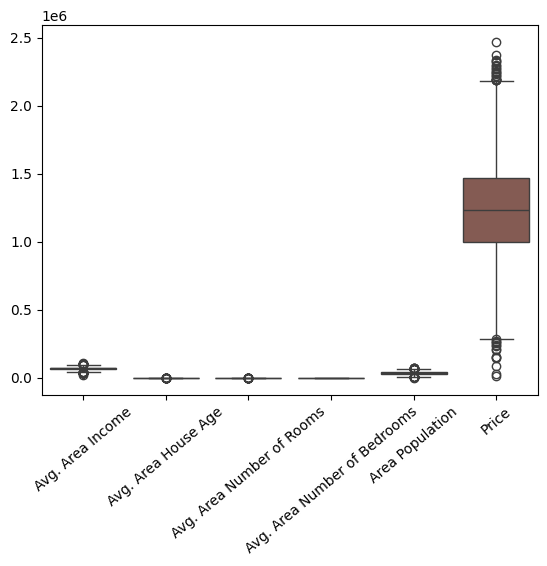

In [14]:
sns.boxplot(df)
plt.xticks(rotation=40)
plt.show()

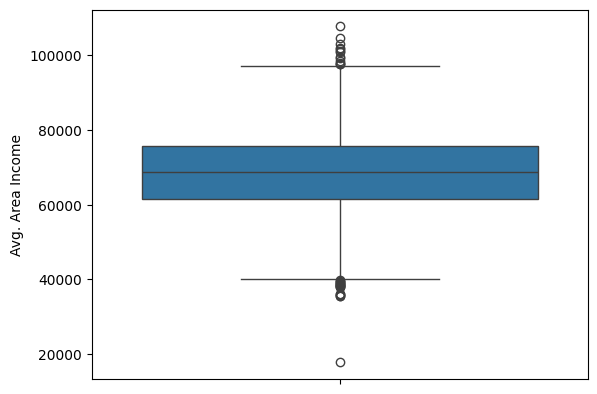

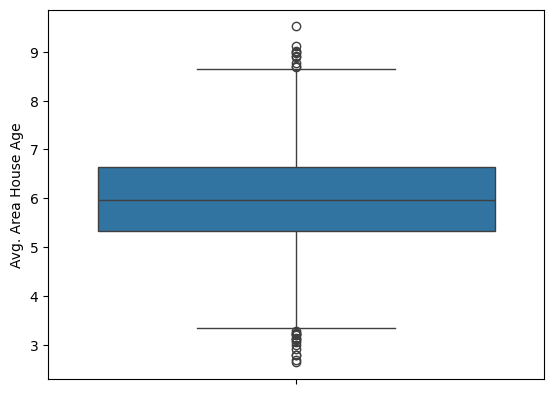

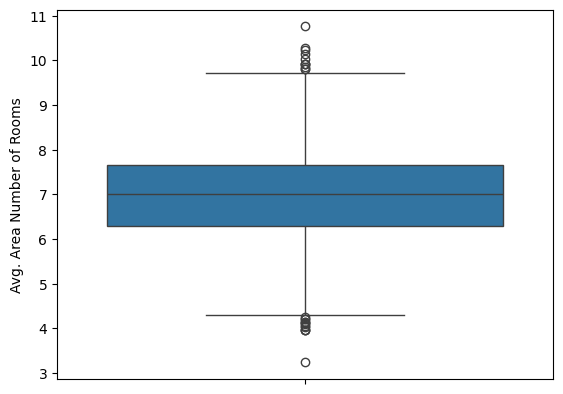

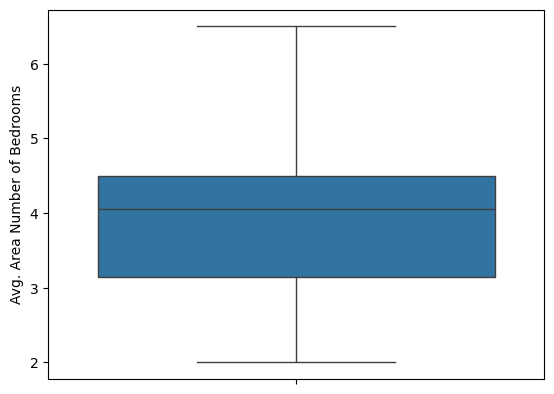

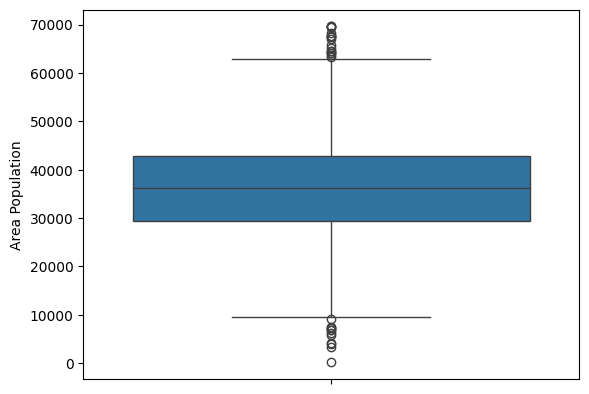

In [15]:
for i in df.columns:
  if i == 'Address' or i == 'Price':
    continue
  else:
    sns.boxplot(df[i])
    plt.show()


# Using IQR - (Inter-Ouartile Rnage)

In [16]:
df.drop('Address', axis=1, inplace=True)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(f'Q1: \n{Q1}\n')
print(f'Q3: \n{Q3}\n')
print(f'IQR: \n{IQR}')

Q1: 
Avg. Area Income                 61480.562388
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928702
Price                           997577.135049
Name: 0.25, dtype: float64

Q3: 
Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64

IQR: 
Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64


In [17]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f'Lower Limit: \n{lower_limit}\n')
print(f'Upper Limit: \n{upper_limit}\n')

Lower Limit: 
Avg. Area Income                 40026.397972
Avg. Area House Age                  3.329495
Avg. Area Number of Rooms            4.249318
Avg. Area Number of Bedrooms         1.115000
Area Population                   9217.885601
Price                           287127.531305
dtype: float64

Upper Limit: 
Avg. Area Income                9.723750e+04
Avg. Area House Age             8.643597e+00
Avg. Area Number of Rooms       9.715803e+00
Avg. Area Number of Bedrooms    6.515000e+00
Area Population                 6.304733e+04
Price                           2.181660e+06
dtype: float64



In [18]:
df = df[~((df < lower_limit) | (df > upper_limit)).any(axis=1)]

In [19]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


# Feature Selection

In [20]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [21]:
df.corr() # finds relation between the columns

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097,0.632031
Avg. Area House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151,0.441675
Avg. Area Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244,0.329630
Avg. Area Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172,0.168606
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000,0.406027
Price,0.632031,0.441675,0.329630,0.168606,0.406027,1.000000


<Axes: >

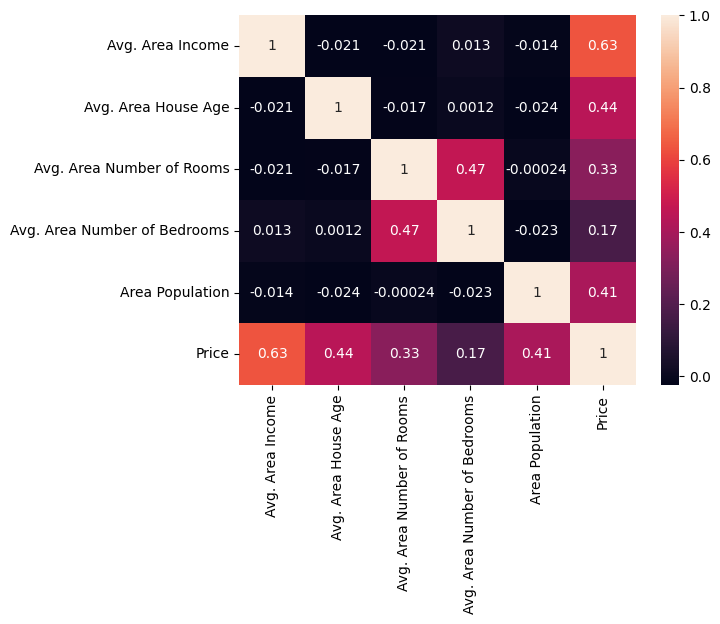

In [22]:
sns.heatmap(df.corr(), annot=True)

# Model Building

## Sperate dependent and independent data

In [23]:
X = df.drop('Price', axis=1)
y = df['Price']

In [24]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [25]:
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


## Split data into training and test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2363,69266.087427,5.891946,7.148314,3.40,37180.500359
1887,60812.864534,7.157499,6.276444,2.22,26411.142277
3633,69206.554811,7.465323,7.624139,6.39,27666.403599
184,82906.654801,5.901452,5.767366,4.26,38820.481944
4526,69664.075765,7.612180,5.945619,2.00,37012.993434
...,...,...,...,...,...
4551,79500.398946,8.554884,6.160048,3.29,32069.117413
478,62685.270752,6.057649,6.766130,2.17,42018.938568
3185,66469.369473,4.663863,6.117542,4.13,22670.608616
3881,59084.725195,7.086564,6.144059,2.11,42955.908360


In [28]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2250,80431.035597,5.474911,6.322611,4.05,34615.598486
4583,62654.359483,5.674788,6.850386,4.24,36718.512313
2729,66300.581924,6.114219,5.588031,4.22,31581.838516
2166,65013.212446,7.321305,7.591328,3.13,23039.889474
4874,67794.294771,8.104891,6.211783,2.45,25903.809477
...,...,...,...,...,...
1520,69882.273926,5.646558,5.647646,4.35,19544.751964
2610,55421.168887,8.223912,7.526952,3.07,30995.209936
2089,77033.913592,4.079782,8.441009,6.26,26160.161047
2331,79817.665761,6.019475,8.073787,5.41,31765.901385


In [29]:
X_train.shape, X_test.shape

((3892, 5), (973, 5))

In [30]:
y_train.shape, y_test.shape

((3892,), (973,))

## Model Selection

### Using Liner Regression

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
print(f'Training Accuracy : {round(lr.score(X_train, y_train), 2)*100}%')

Training Accuracy : 91.0%


In [33]:
print(f'Testing Accuracy : {round(lr.score(X_test, y_test), 2)*100}%')

Testing Accuracy : 91.0%


### Using Decision Tree

In [34]:
dtree = DecisionTreeRegressor(max_depth= 9)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [35]:
print(f'Training Accuracy : {round(dtree.score(X_train, y_train), 2)*100}%')

Training Accuracy : 92.0%


In [36]:
print(f'Testing Accuracy : {round(dtree.score(X_test, y_test), 2)*100}%')

Testing Accuracy : 78.0%


### Using Grading Boosting

In [37]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [38]:
print(f'Training Accuracy : {round(gb.score(X_train, y_train), 2)*100}%')

Training Accuracy : 92.0%


In [39]:
print(f'Testing Accuracy : {round(gb.score(X_test, y_test), 2)*100}%')

Testing Accuracy : 89.0%


# Model Training

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Model Prediction

In [41]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [42]:
X_train[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2363,69266.087427,5.891946,7.148314,3.40,37180.500359
1887,60812.864534,7.157499,6.276444,2.22,26411.142277
3633,69206.554811,7.465323,7.624139,6.39,27666.403599


In [43]:
y_train[:3]

,Price
2363,1.107160e+06
1887,9.782413e+05
3633,1.404036e+06


In [44]:
y_train_pred[:3]

array([1266013.93072291, 1026729.25636165, 1443436.66594479])

## Model Evaluation

Slopes/Coefficent

In [45]:
lr.coef_

array([2.15590620e+01, 1.65958273e+05, 1.19758233e+05, 1.06755714e+03,
       1.49866650e+01])

In [46]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [47]:
pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

,Coefficient
Avg. Area Income,21.559062
Avg. Area House Age,165958.272744
Avg. Area Number of Rooms,119758.232952
Avg. Area Number of Bedrooms,1067.557140
Area Population,14.986665


In [48]:
def training_evaluation(actual, predicted):
  mse = mean_squared_error(actual, predicted)
  rmse = np.sqrt(mean_squared_error(actual, predicted))
  mae = mean_absolute_error(actual, predicted)
  r2 = r2_score(actual, predicted)

  print('mse : ', mse)
  print('rmse : ', rmse)
  print('mae : ', mae)
  print('r2 : ', r2)

  plt.scatter(actual, predicted ,color = 'k')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.plot([actual,predicted], [actual,predicted],color = 'red')
  plt.show()

mse :  10083105986.347572
rmse :  100414.67017496782
mae :  80921.16373101504
r2 :  0.911537564238988


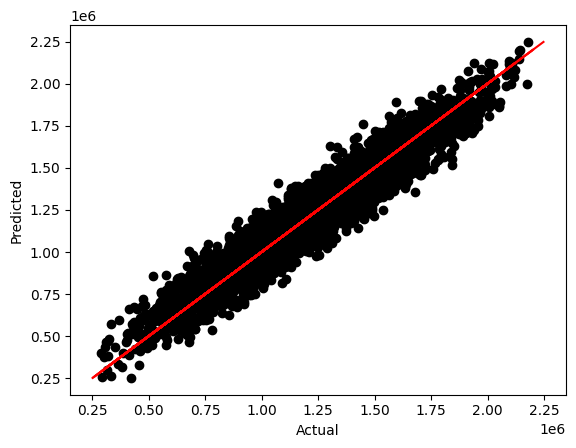

In [49]:
training_evaluation(y_train, y_train_pred)